Tools

In [250]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

Util Functions


In [251]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [252]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [253]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [254]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [255]:
def r2_score(y_true, y_pred):
    num = np.sum((y_true - y_pred)**2)
    denom = np.sum((y_true - y_true.mean())**2)

    score = 1 - num / denom
    return score

Data preprocessing


In [256]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [274]:
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [275]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [276]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

In [ ]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0
num_iters = 1000  
learning_rates = [0.001, 0.01, 0.1, 0.5]  
J_histories = []

Iteration    0: Cost 160941777.67   
Iteration  100: Cost 135219459.42   
Iteration  200: Cost 114158477.19   
Iteration  300: Cost 96911977.96   
Iteration  400: Cost 82787351.30   
Iteration  500: Cost 71218064.74   
Iteration  600: Cost 61740655.15   
Iteration  700: Cost 53975929.84   
Iteration  800: Cost 47613605.11   
Iteration  900: Cost 42399752.21   
Iteration    0: Cost 158397765.14   
Iteration  100: Cost 37610295.23   
Iteration  200: Cost 21247502.36   
Iteration  300: Cost 19003149.30   
Iteration  400: Cost 18691460.89   
Iteration  500: Cost 18647629.22   
Iteration  600: Cost 18641386.71   
Iteration  700: Cost 18640486.17   
Iteration  800: Cost 18640354.55   
Iteration  900: Cost 18640335.06   
Iteration    0: Cost 134223633.34   
Iteration  100: Cost 18640331.80   
Iteration  200: Cost 18640331.61   
Iteration  300: Cost 18640331.61   
Iteration  400: Cost 18640331.61   
Iteration  500: Cost 18640331.61   
Iteration  600: Cost 18640331.61   
Iteration  700: Cost 18

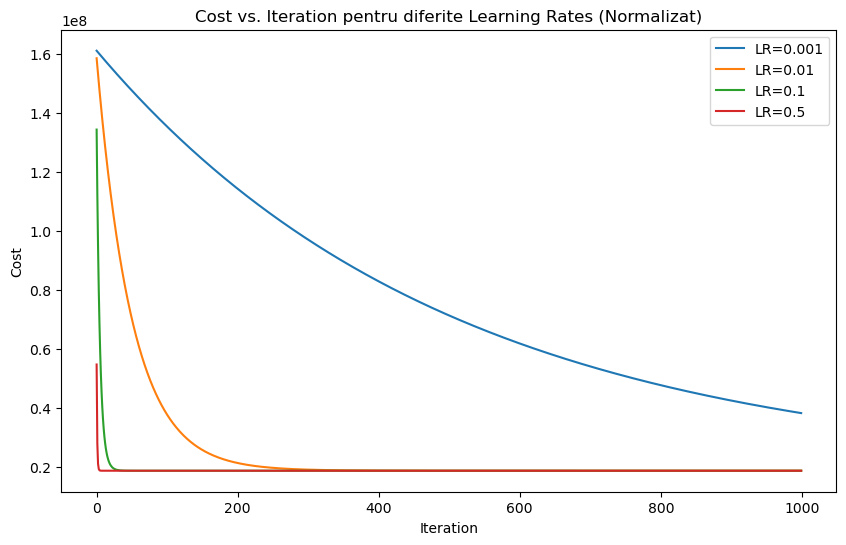

In [287]:
plt.figure(figsize=(10, 6))
for alpha in learning_rates:
    w, b, J_hist = gradient_descent(X_train_normalized, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)
    J_histories.append(J_hist)
    plt.plot(J_hist, label=f'LR={alpha}')

plt.title('Cost vs. Iteration pentru diferite Learning Rates (Normalizat)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.close()

In [279]:
alpha_opt = 0.1
w_final, b_final, J_hist = gradient_descent(X_train_normalized, y_train, w_init, b_init, compute_cost, compute_gradient, alpha_opt, num_iters)

Iteration    0: Cost 134223633.34   
Iteration  100: Cost 18640331.80   
Iteration  200: Cost 18640331.61   
Iteration  300: Cost 18640331.61   
Iteration  400: Cost 18640331.61   
Iteration  500: Cost 18640331.61   
Iteration  600: Cost 18640331.61   
Iteration  700: Cost 18640331.61   
Iteration  800: Cost 18640331.61   
Iteration  900: Cost 18640331.61   


Gradient Descent

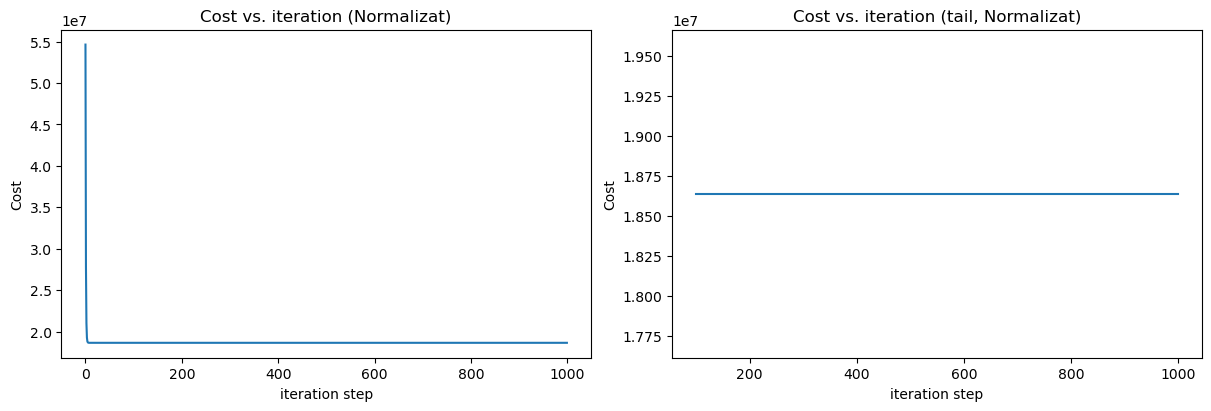

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration (Normalizat)");  ax2.set_title("Cost vs. iteration (tail, Normalizat)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:

y_predicted_train = [np.dot(i, w_final) + b_final for i in X_train_normalized]

r2_train = r2_score(y_train, y_predicted_train)


y_predicted_val = [np.dot(i, w_final) + b_final for i in X_val_normalized]


r2_val = r2_score(y_val, y_predicted_val)

print(f"R² score for training set (normalized): {r2_train:.4f}")
print(f"R² score for validation set (normalized): {r2_val:.4f}")

R² score for training set (normalized): 0.7417
R² score for validation set (normalized): 0.7833


In [ ]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
feature_importance = np.abs(w_final)  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

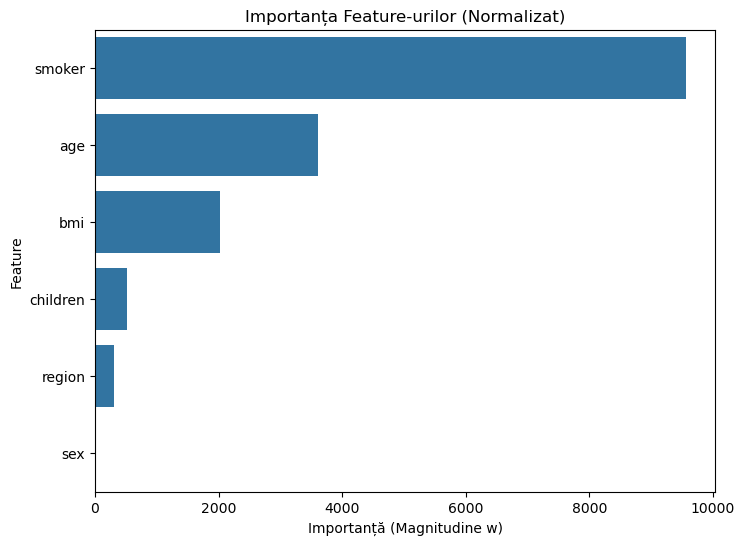

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importanța Feature-urilor (Normalizat)')
plt.xlabel('Importanta (Magnitudine w)')
plt.ylabel('Feature')
plt.show()

In [ ]:
print("\nImportanta feature-urilor:")
print(importance_df)


Importanța feature-urilor:
    Feature   Importance
4    smoker  9557.143383
0       age  3616.108652
2       bmi  2028.308579
3  children   516.662566
5    region   302.387980
1       sex     9.392954
